In [91]:
import pandas as pd
import numpy as np


In [92]:
df=pd.read_csv('train.csv')
df.head()
df1=pd.read_csv('train.csv')

In [43]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [44]:
#getting frequnecy counts of each categorical variable to handle missing data
df['user_name'].value_counts()



@vossroger          17539
@wineschach          8320
@vboone              6908
@paulgwine           6824
@kerinokeefe         5675
@mattkettmann        4298
@wawinereport        3471
@JoeCz               3054
@gordone_cellars     2768
@AnneInVino          2314
@laurbuzz            1055
@suskostrzewa         511
@worldwineguys        503
@bkfiona               20
@winewchristina         4
Name: user_name, dtype: int64

In [45]:
df['winery'].value_counts()

Testarossa                    175
Louis Latour                  168
Williams Selyem               165
Chateau Ste. Michelle         163
Georges Duboeuf               163
                             ... 
Screw Kappa Napa                1
Imagine                         1
Granite Heights                 1
Andean Sky                      1
Domaine Philippe Delesvaux      1
Name: winery, Length: 13786, dtype: int64

In [46]:
df['region_2'].value_counts()

Central Coast        7503
Sonoma               6776
Columbia Valley      5679
Napa                 5119
Willamette Valley    2605
California Other     1926
Finger Lakes         1314
Napa-Sonoma           919
Sierra Foothills      772
Central Valley        641
Southern Oregon       548
Oregon Other          519
Long Island           503
North Coast           411
Washington Other      380
South Coast           173
New York Other        161
Name: region_2, dtype: int64

In [47]:
df['variety'].value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [60]:
#replacing missing categorical data with most frequently occurring value
for column in ['user_name', 'country','designation', 'region_1', 'region_2','province']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [61]:
#replacing continuous NaN (price) with mean value
price_array = df[df["price"]!=np.nan]["price"]

df["price"]=df["price"].replace(np.nan,price_array.mean())

In [62]:
df.isnull().sum()

user_name             0
country               0
review_title          0
review_description    0
designation           0
points                0
price                 0
province              0
region_1              0
region_2              0
winery                0
variety               0
dtype: int64

In [51]:
df.dtypes

user_name              object
country                object
review_title           object
review_description     object
designation            object
points                  int64
price                 float64
province               object
region_1               object
region_2               object
winery                 object
variety                object
dtype: object

In [63]:
df[['user_name','country','designation','region_1','region_2','winery','variety']] = df[['user_name','country','designation','region_1','region_2','winery','variety']].astype('category')


In [64]:
df.dtypes

user_name             category
country               category
review_title            object
review_description      object
designation           category
points                   int64
price                  float64
province                object
region_1              category
region_2              category
winery                category
variety               category
dtype: object

In [65]:
cat_columns = df.select_dtypes(['category']).columns

In [66]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [67]:
df

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,10,1,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",17594,83,10.0,Australia Other,848,1,399,5
1,11,35,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,19492,89,15.0,Washington,238,3,9668,17
2,10,18,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,5445,94,80.0,Piedmont,64,1,10873,11
3,10,11,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,12333,87,22.0,Southwest France,85,1,5427,1
4,10,11,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",13344,88,33.0,France Other,952,1,3789,9
...,...,...,...,...,...,...,...,...,...,...,...,...
82652,12,32,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",5832,84,12.0,Northern Spain,724,1,9332,25
82653,10,35,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",21722,85,21.0,New Mexico,630,1,13282,3
82654,10,11,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,16663,87,14.0,Beaujolais,75,1,5319,6
82655,10,11,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",19492,91,20.0,Bordeaux,412,1,2427,0


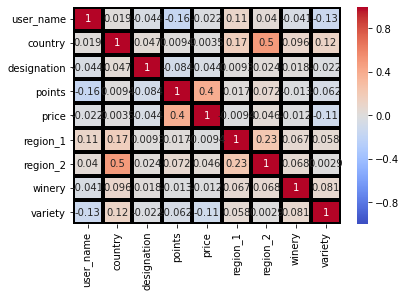

In [68]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [93]:
#correlation scores aren't significant enough
##switching to classification using text reviews
from io import StringIO
col = ['variety', 'review_description']
df1 = df1[col]
df1 = df1[pd.notnull(df1['review_description'])]
df1.columns = ['variety', 'review_description']
df1['category_id'] = df1['variety'].factorize()[0]
category_id_df = df1[['variety', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'variety']].values)
df1.head(15)

,variety,review_description,category_id
0,Chardonnay,"Classic Chardonnay aromas of apple, pear and h...",0
1,Red Blend,This wine is near equal parts Syrah and Merlot...,1
2,Nebbiolo,Barolo Conca opens with inky dark concentratio...,2
3,Bordeaux-style White Blend,It's impressive what a small addition of Sauvi...,3
4,Malbec,"This ripe, sweet wine is rich and full of drie...",4
5,Cabernet Sauvignon,"Strident aromas of licorice, herbs, berries an...",5
6,Red Blend,"Half Syrah and half Cabernet Sauvignon, with 4...",1
7,Zinfandel,"High-toned red fruit stars in this wine, a nic...",6
8,Pinot Noir,"Displaying typical McMinnville AVA subtlety, t...",7
9,Red Blend,This blend of Sangiovese and 10% Merlot opens ...,1


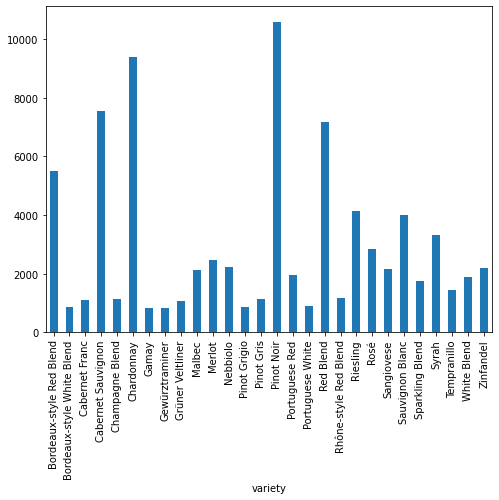

In [94]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df1.groupby('variety').review_description.count().plot.bar(ylim=0)
plt.show()

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', stop_words='english')


In [100]:
features = tfidf.fit_transform(df1.review_description).toarray()
labels = df1.category_id


In [106]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for variety, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  
  print("# '{}':".format(variety))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  

# 'Bordeaux-style Red Blend':
  . Most correlated unigrams:
. bordeaux
. sample
# 'Bordeaux-style White Blend':
  . Most correlated unigrams:
. sémillon
. botrytis
# 'Cabernet Franc':
  . Most correlated unigrams:
. francs
. franc
# 'Cabernet Sauvignon':
  . Most correlated unigrams:
. cassis
. cab
# 'Champagne Blend':
  . Most correlated unigrams:
. dosage
. champagne
# 'Chardonnay':
  . Most correlated unigrams:
. buttered
. chardonnay
# 'Gamay':
  . Most correlated unigrams:
. morgon
. beaujolais
# 'Gewürztraminer':
  . Most correlated unigrams:
. lychee
. gewürztraminer
# 'Grüner Veltliner':
  . Most correlated unigrams:
. screwcap
. grüner
# 'Malbec':
  . Most correlated unigrams:
. malbecs
. malbec
# 'Merlot':
  . Most correlated unigrams:
. merlots
. merlot
# 'Nebbiolo':
  . Most correlated unigrams:
. nebbiolo
. barolo
# 'Pinot Grigio':
  . Most correlated unigrams:
. grigios
. grigio
# 'Pinot Gris':
  . Most correlated unigrams:
. pear
. gris
# 'Pinot Noir':
  . Most correlate

In [107]:
#Using Naive-Bayes to classify text to variety
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df1['review_description'], df1['variety'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [113]:
#taking a review from training set to make prediction (Entry #2 in the training dataset)
print(clf.predict(count_vect.transform(["This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of deliciousness that is hard to resist."])))

['Red Blend']


In [117]:
#The classifier is making sound predictions
##Trying other classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


In [118]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

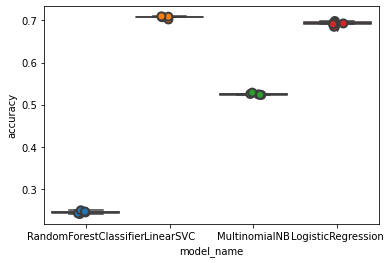

In [119]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [120]:
#Checking Accuracy
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.707600
LogisticRegression        0.692707
MultinomialNB             0.525123
RandomForestClassifier    0.244457
Name: accuracy, dtype: float64

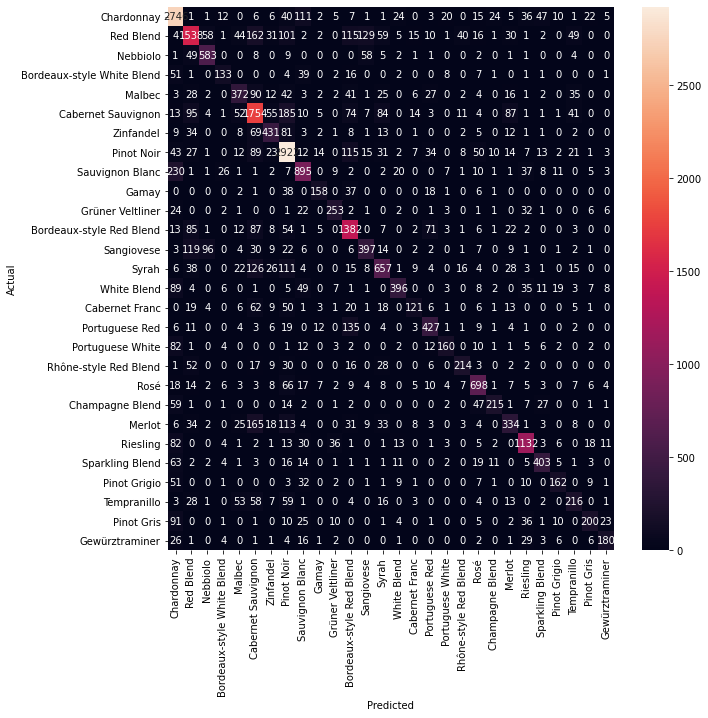

In [122]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df1.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.variety.values, yticklabels=category_id_df.variety.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [128]:
#the SVM model is doing a reasonable job in predicting the data